In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import scipy.optimize as op
from datetime import datetime

import os
from pandas.tseries.offsets import BDay

## a) Loading the return series

In [2]:
ret_file = os.path.join('MFE_DAM', 'Data', 'US.csv')
us_ret = pd.read_csv(ret_file, parse_dates=[0], index_col=[0], na_values=[0])
us_ret = us_ret.fillna(method='ffill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B90DEB38>,
      dtype=object)

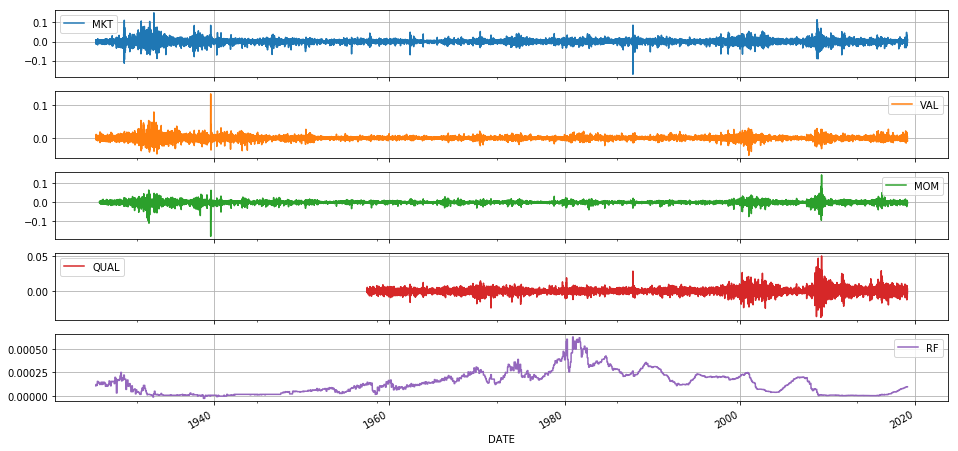

In [3]:
us_ret.plot(figsize=(16,8), grid=True, subplots=True)

In [4]:
us_Price = (us_ret+1).cumprod().shift(1)
for col in us_Price.columns:
    lastNanRow = max(np.where(us_Price[col].isnull())[0])
    us_Price.loc[us_Price.index[lastNanRow],col] = 1
us_Price

,MKT,VAL,MOM,QUAL,RF
DATE,,,,,
1926-07-31,1.000000,1.000000,NaN,NaN,1.000000
1926-08-02,1.004327,1.000119,NaN,NaN,1.000106
1926-08-03,1.012653,1.001592,NaN,NaN,1.000226
1926-08-04,1.017484,0.999310,NaN,NaN,1.000346
1926-08-05,1.013819,1.000493,NaN,NaN,1.000466
1926-08-06,1.012916,1.007472,NaN,NaN,1.000586
1926-08-07,1.019714,1.009039,NaN,NaN,1.000706
1926-08-09,1.024276,1.007618,NaN,NaN,1.000826
1926-08-10,1.026235,1.006002,NaN,NaN,1.000946


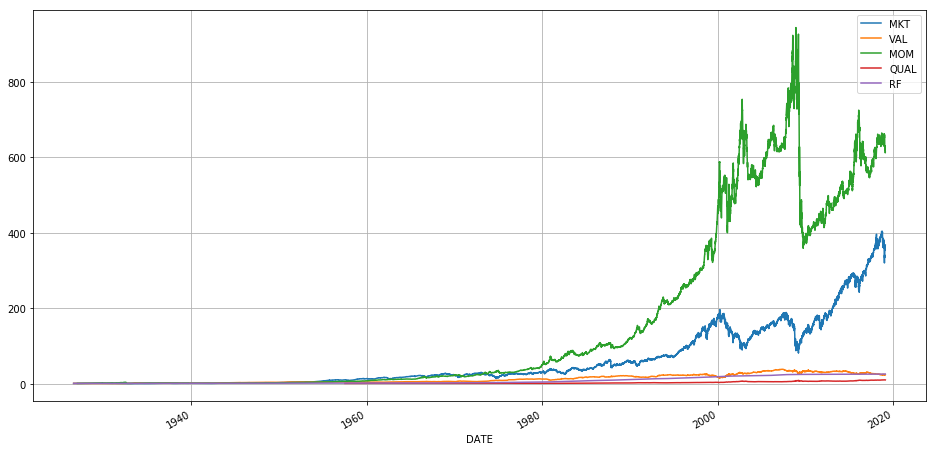

In [5]:
us_Price.plot(figsize=(16,8), grid=True, subplots=False)

## b) Functions definition

In [6]:
def adjustWeights(weights, df_Price):
    weights_adj = weights.copy()
    df_Price = df_Price.reindex(columns=weights.columns)
    
    mask, _ = df_Price.align(weights_adj, join='right', axis=0)
    weights_adj[mask.isnull()] = 0
    weights_adj['RF'] = 1-weights_adj.sum(axis = 1, skipna = True)
    return weights_adj

In [60]:
def convertWeights2Shares(weights, df_Price, GMV, Tcost_vec):
    """
    Tcost considered
    """
    turnover = 0
    shares = pd.DataFrame(columns = weights.columns, index = weights.index)
    n_col = shares.shape[1]
    idx = weights.index
    asset_Price = df_Price.reindex(columns=weights.columns)

    shares.loc[idx[0],:] = GMV*weights.loc[idx[0],:]/asset_Price.loc[idx[0],:]
    for i in range(1,len(idx)):
        if abs(weights.iloc[i,0:n_col-1].sum()) < 1e-10:
            shares.loc[idx[i],:] = shares.loc[idx[i-1],:]
        else:
            val_wo_rebalance = shares.loc[idx[i-1],:]*asset_Price.loc[idx[i],:]
            GMV_wo_rebalance = val_wo_rebalance.sum()
            val_before_Tcost = GMV_wo_rebalance*weights.loc[idx[i],:]
            val_abs_diff = val_before_Tcost.subtract(val_wo_rebalance, fill_value=0).abs()
            cost = (val_abs_diff*Tcost_vec).sum()
            val_after_Tcost = (GMV_wo_rebalance-cost)*weights.loc[idx[i],:]
            shares.loc[idx[i],:] = val_after_Tcost/asset_Price.loc[idx[i],:]
            turnover += cost
    return (shares, turnover)

In [8]:
def df2Daily(df, idx):
    """
    Change the weights frequency into daily basis
    Forward fill the inbetween elements
    """
    df_daily = pd.DataFrame(index = idx)
    for col in df.columns:
        df_daily[col] = df[col]
    df_daily.fillna(method='ffill',inplace=True)
    return df_daily

In [9]:
def calcPnl(df_Price, shares_daily):
    price_reindexed = df_Price.reindex(columns=shares_daily.columns)
    pnl = shares_daily*price_reindexed.values
    nonNanRow = min(np.where((~pnl.isnull()).any(axis=1))[0])
    pnl = pnl.sum(axis=1)
    pnl.iloc[:nonNanRow] = np.nan
    pnl = pnl/pnl[nonNanRow]-1
    pnl.dropna(inplace=True)
    return (pnl, nonNanRow)

In [10]:
def cumul_perf(ret):
    """
    Function to calculate the cumulative excess return series
    """
    return ((1 + ret).cumprod(axis=0)) - 1

In [134]:
def maxDrawDown(ret):
    T = ret.iloc[0]
    Vmin = ret.iloc[0]
    Tmax = max(0.,T)
    for i in range(1,len(ret)):
        T += ret.iloc[i]
        if T-Tmax < Vmin:
            Vmin = T-Tmax
        if T>Tmax:
            Tmax = T
    return Vmin

In [135]:
def calcStats(perf, perf_MKT, rf):
    ret = perf.diff()
    ret.iloc[0] = perf.iloc[0]
    ret_MKT = perf_MKT.diff()
    ret_MKT.iloc[0] = perf_MKT.iloc[0]
    
    excessRet = (ret-rf).mean()*252
    vol = ret.std(ddof=0)*np.sqrt(252)
    SR = excessRet/vol
    MDD = maxDrawDown(ret)
    MRDD = maxDrawDown(ret-ret_MKT)
    return pd.Series([excessRet, vol, SR, MDD, MRDD], index = ['Excess return', \
                        'Volatility', 'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

## c) Parameter Configuration

In [13]:
day_lag = 1
GMV = 1e6
Tcost_vec = np.array([10e-4,120e-4,275e-4,120e-4, 0])

## d) Testing weights

In [14]:
testingFile = os.path.join('MFE_DAM', 'test_weights.csv')
weights = pd.read_csv(testingFile, parse_dates=[0], index_col=[0])
weights.index = weights.index + BDay(day_lag)
weights['RF'] = 0.

In [15]:
weights.drop(weights.loc[:'1926-7-31'].index, axis=0, inplace=True)

In [16]:
weights.loc[weights.isnull().any(axis=1)]

,MKT,VAL,MOM,QUAL,RF
Date,,,,,


In [17]:
weights = adjustWeights(weights, us_Price)
(shares, turnover) = convertWeights2Shares(weights, us_Price, GMV, Tcost_vec)
shares_daily = df2Daily(shares, us_Price.index)
shares

,MKT,VAL,MOM,QUAL,RF
Date,,,,,
1926-08-02,658592,112839,NaN,NaN,225682
1926-09-01,620828,121474,NaN,NaN,255243
1926-10-01,609050,125867,NaN,NaN,262690
1926-11-01,632833,117736,NaN,NaN,247565
1926-12-01,617264,123012,NaN,NaN,257677
1927-01-03,589323,130260,139870,NaN,137465
1927-02-01,586342,128122,140923,NaN,141771
1927-03-01,556558,135614,153147,NaN,152393
1927-04-01,542064,143297,152892,NaN,159331


In [18]:
turnover

44418104.530484974

In [19]:
perf, nonNanRow = calcPnl(us_Price, shares_daily)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])

Text(0.5,1,'Pnl Comparison')

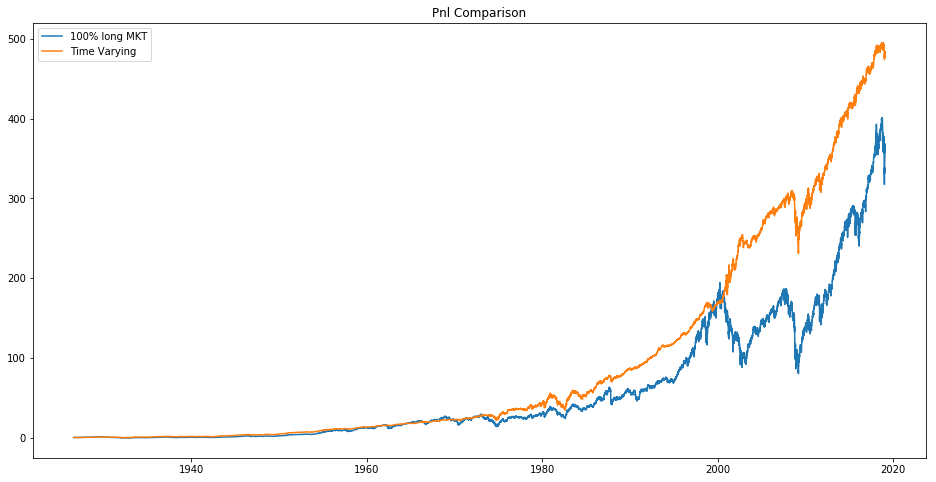

In [20]:
plt.figure('Pnl Comparison',figsize=(16,8))
plt.clf()
plt.plot(perf_MKT.index, perf_MKT.values, label='100% long MKT')
plt.plot(perf.index, perf.values, label='Time Varying')
plt.legend(loc = 'best')
plt.title('Pnl Comparison')

## e) Turnover Smoothing

In [98]:
testingFile = os.path.join('MFE_DAM', 'test_weights.csv')
weights = pd.read_csv(testingFile, parse_dates=[0], index_col=[0])
weights.index = weights.index + BDay(day_lag)
weights['RF'] = 0.

In [99]:
weights.drop(weights.loc[:'1926-7-31'].index, axis=0, inplace=True)

In [100]:
weights.loc[weights.isnull().any(axis=1)]

,MKT,VAL,MOM,QUAL,RF
Date,,,,,


In [101]:
weights

,MKT,VAL,MOM,QUAL,RF
Date,,,,,
1926-08-02,0.661442,0.112853,0.112853,0.112853,0.0
1926-09-01,0.624792,0.125069,0.125069,0.125069,0.0
1926-10-01,0.613540,0.128820,0.128820,0.128820,0.0
1926-11-01,0.627873,0.124042,0.124042,0.124042,0.0
1926-12-01,0.617232,0.127589,0.127589,0.127589,0.0
1927-01-03,0.595806,0.134731,0.134731,0.134731,0.0
1927-02-01,0.585957,0.138014,0.138014,0.138014,0.0
1927-03-01,0.564196,0.145268,0.145268,0.145268,0.0
1927-04-01,0.545512,0.151496,0.151496,0.151496,0.0


In [102]:
weights = weights.ewm(span=10, axis=0).mean()

In [103]:
weights

,MKT,VAL,MOM,QUAL,RF
Date,,,,,
1926-08-02,0.661442,0.112853,0.112853,0.112853,0.0
1926-09-01,0.641284,0.119572,0.119572,0.119572,0.0
1926-10-01,0.630131,0.123290,0.123290,0.123290,0.0
1926-11-01,0.629387,0.123538,0.123538,0.123538,0.0
1926-12-01,0.625898,0.124701,0.124701,0.124701,0.0
1927-01-03,0.618082,0.127306,0.127306,0.127306,0.0
1927-02-01,0.610341,0.129886,0.129886,0.129886,0.0
1927-03-01,0.599843,0.133386,0.133386,0.133386,0.0
1927-04-01,0.588022,0.137326,0.137326,0.137326,0.0


In [104]:
weights = adjustWeights(weights, us_Price)
(shares, turnover) = convertWeights2Shares(weights, us_Price, GMV, Tcost_vec)
shares_daily = df2Daily(shares, us_Price.index)
shares

,MKT,VAL,MOM,QUAL,RF
Date,,,,,
1926-08-02,658592,112839,NaN,NaN,225682
1926-09-01,637269,116144,NaN,NaN,244044
1926-10-01,625597,120478,NaN,NaN,251444
1926-11-01,634071,117204,NaN,NaN,246445
1926-12-01,625689,120180,NaN,NaN,251746
1927-01-03,611387,123087,132168,NaN,129896
1927-02-01,610392,120507,132547,NaN,133345
1927-03-01,591964,124572,140678,NaN,139985
1927-04-01,584183,129867,138563,NaN,144398


In [105]:
turnover

37689885.81248214

In [106]:
perf, nonNanRow = calcPnl(us_Price, shares_daily)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])

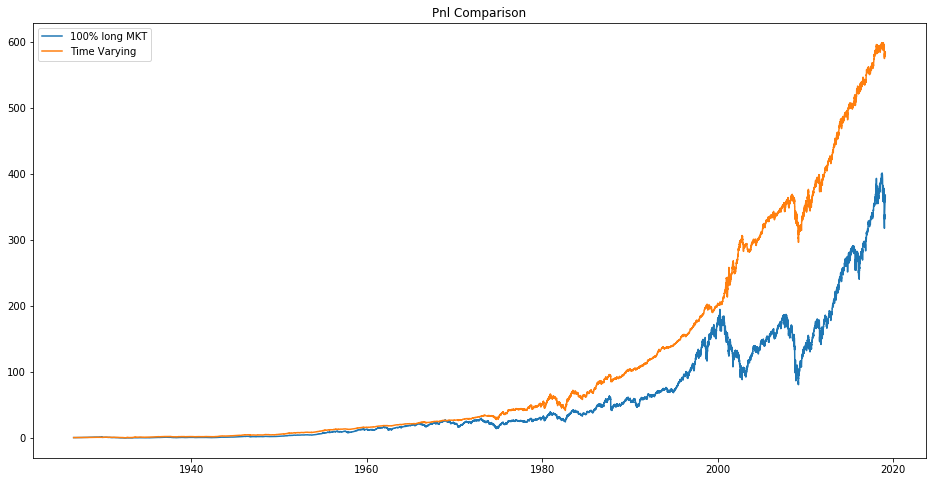

In [107]:
plt.figure('Pnl Comparison',figsize=(16,8))
plt.clf()
plt.plot(perf_MKT.index, perf_MKT.values, label='100% long MKT')
plt.plot(perf.index, perf.values, label='Time Varying')
plt.legend(loc = 'best')
plt.title('Pnl Comparison')
plt.savefig("charts/Replicated_Test_Weight_Pnl.pdf", bbox_inches='tight')

## f) Garch(1,1) Model

In [19]:
def garchFunc(coeff, y, p, q, flag = False):
    # drop the first one since theres no lagged value for it
    r = y[1:].values
    r_lagged = y.shift(1)[1:].values
    T = len(r)
    resid = r - (coeff[0] + coeff[1]*r_lagged)
    pq = max(p,q)
    # ignore t = pq since its not part of the sum
    resid_t = resid[pq:]
    
    # filter the h
    h_t = []
    # really important how to choose h[0]
    h_t.append(np.mean(resid ** 2))
    h_t = h_t * pq
    # calc the ht
    for i in range(pq,T):
        tmp = coeff[2]
        for j in range((3+q),(3+q+p)):
            tmp += coeff[j]*h_t[i-(j-(2+q))]
        for j in range(3,(3+q)):
            tmp += coeff[j]*( resid[i-(j-2)] ** 2)
        h_t.append(tmp)    
    
    part_1 = -(T-pq)*np.log(2*np.pi)
    part_2 = -np.log(h_t[pq:]).sum()
    part_3 = -np.sum(np.square(resid_t)/h_t[pq:])

    condloglike = 0.5*(part_1 + part_2 + part_3)
    # because we are using a minimize function for maximizing likelihood
    
    if (flag):
        return pd.Series(h_t[0:1]+h_t)
    
    return -condloglike

In [20]:
garch_Train_Yrs = 1

prsn = pd.DataFrame(columns = ['c', 'phi','zeta','alpha','delta'])
p = 1
q = 1
  
x0 = np.asarray([0.001]*(3+q)+[0.9]*p)
bounds = ((None,None),)*2+((0.00000001,None),)*(1+q+p)
rsl11 = op.minimize(garchFunc, x0, args=(us_ret.iloc[0:(252*garch_Train_Yrs),0],p,q), bounds=bounds)
print(rsl11.message)

prsn.loc[0] = rsl11.x
vol_garch = np.sqrt(garchFunc(rsl11.x,us_ret['MKT'],p,q,True)*252)
vol_garch.index = us_ret.index
prsn

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'


,c,phi,zeta,alpha,delta
0,0.00032,0.000895,4.680912e-07,0.006067,0.973338


In [21]:
RV_month = us_ret['MKT'].groupby([us_ret.index.year, us_ret.index.month]).std()*np.sqrt(252)
RV_month.index = RV_month.index.map(lambda x: pd.to_datetime('{:d}/{:d}'.format(x[0],x[1]),format='%Y/%m')\
                                    +pd.offsets.MonthEnd())

Text(0.5,1,'Realized Vol of MKT vs. Garch(1,1)')

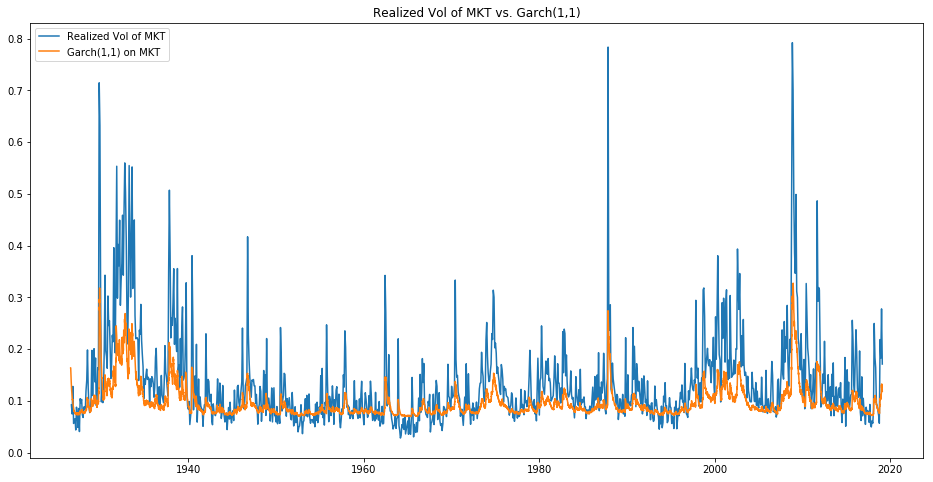

In [22]:
plt.figure('Realized Vol of MKT vs. Garch(1,1)',figsize=(16,8))
plt.clf()
plt.plot(RV_month.index, RV_month.values, label='Realized Vol of MKT')
plt.plot(vol_garch.index, vol_garch.values, label='Garch(1,1) on MKT')
plt.legend(loc = 'best')
plt.title('Realized Vol of MKT vs. Garch(1,1)')

In [23]:
len(RV_month)

1111

In [24]:
len(vol_garch)

25289

In [25]:
RV_month.to_csv('RV_month_US_MKT.csv')

In [26]:
vol_garch.to_csv('vol_garch_US_MKT.csv')

## g) Fixed-weight Portfolios

In [27]:
def fixedWts_BT(weights, df_Price, wtsVec, GMV, Tcost_vec):
    fixedWts = pd.DataFrame(index = weights.index, columns = weights.columns)
    for i in range(0, len(fixedWts)):
        fixedWts.loc[fixedWts.index[i],:] = wtsVec
    
    fixedWts = adjustWeights(fixedWts, df_Price)
    (shares, turnover) = convertWeights2Shares(fixedWts, df_Price, GMV, Tcost_vec)
    shares_daily = df2Daily(shares, df_Price.index)
    perf, nonNanRow = calcPnl(df_Price, shares_daily)
    return (perf, nonNanRow)

In [28]:
inputs = {
    'Pure_Val': np.array([0.,1.,0.,0.,0.]),
    'Pure_Mom': np.array([0.,0.,1.,0.,0.]),
    'Pure_Qual': np.array([0.,0.,0.,1.,0.]),
    'Eq Wts': np.array([0.,1/3,1/3,1/3,0.]),
    'Val Overwt': np.array([0.,0.5,0.25,0.25,0.]),
    'Mom Overwt': np.array([0.,0.25,0.5,0.25,0.]),
    'Qual Overwt': np.array([0.,0.25,0.25,0.5,0.]),
    'Qual Underwt': np.array([0.,0.4,0.4,0.2,0.]),
    'Mom Underwt': np.array([0.,0.4,0.2,0.4,0.]),
    'Val Underwt': np.array([0.,0.2,0.4,0.4,0.]),
}

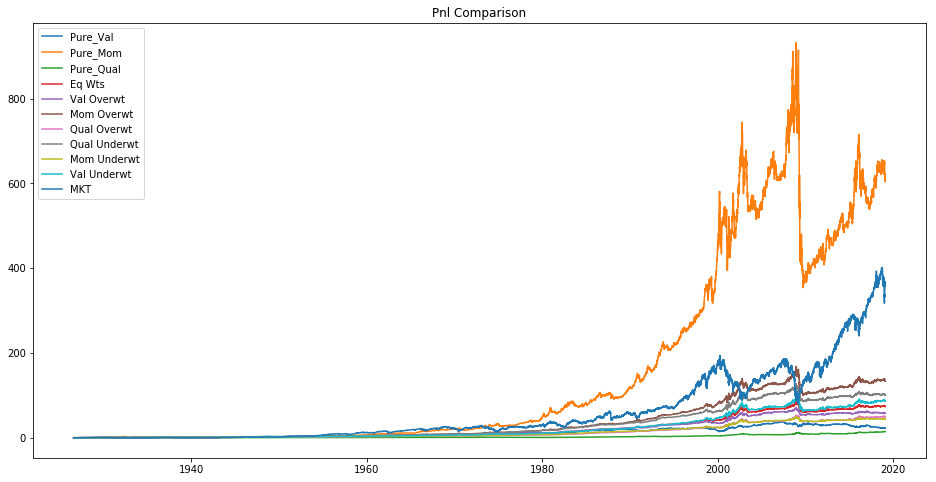

In [31]:
plt.figure('Pnl Comparison',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = fixedWts_BT(weights, us_Price, value, GMV, Tcost_vec)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('Pnl Comparison')
plt.savefig("charts/fixedWts_fig.pdf", bbox_inches='tight')

## h) Time-varying Weight Portfolios

In [41]:
def timeVaryingWts_BT(direc, file, df_Price, day_lag, GMV, Tcost_vec, turnoverSmt = False):
    dynamicFile = os.path.join('MFE_DAM', 'Outputs', direc, file)
    weights = pd.read_csv(dynamicFile, parse_dates=[0], index_col=[0])
    weights.index = weights.index + BDay(day_lag)
    weights['RF'] = 0.
    weights.drop(weights.loc['2019-02-01':].index, axis=0, inplace=True)
    if turnoverSmt:
        weights = weights.ewm(span=10, axis=0).mean()

    weights = adjustWeights(weights, df_Price)
    (shares, turnover) = convertWeights2Shares(weights, df_Price, GMV, Tcost_vec)
    shares_daily = df2Daily(shares, df_Price.index)
    perf, nonNanRow = calcPnl(df_Price, shares_daily)
    return (perf, nonNanRow)

### learn_score_norm

In [146]:
inputs = {
    'short-False_exp-beta': 'w_learn_score_norm_short-False_exp-beta.csv',
    'short-False_exp-t': 'w_learn_score_norm_short-False_exp-t.csv',
    'short-True_exp-beta': 'w_learn_score_norm_short-True_exp-beta.csv',
    'short-True_exp-t': 'w_learn_score_norm_short-True_exp-t.csv'
}

,short-False_exp-beta,short-False_exp-t,short-True_exp-beta,short-True_exp-t,MKT
Excess return,-0.054599,-0.056960,-0.061635,-0.061634,0.185677
Volatility,0.058613,0.045866,0.042995,0.034526,0.574991
Sharpe ratio,-0.931518,-1.241875,-1.433530,-1.785154,0.322922
Max drawdown,-0.833635,-0.905664,-1.022138,-1.018956,-2.462366
Max relative drawdown,-8.494048,-8.578220,-8.699817,-8.697717,0.000000


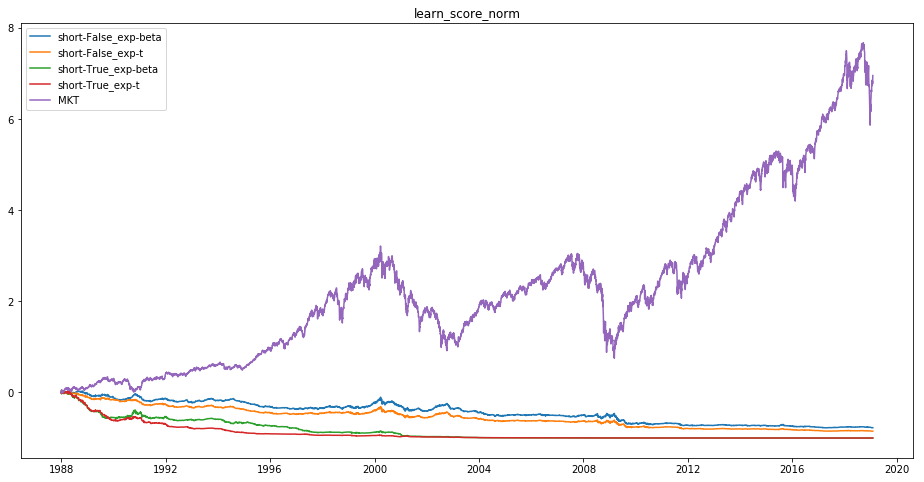

In [147]:
category = 'learn_score_norm'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('learn_score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('learn_score_norm')
plt.savefig("charts/learn_score_norm_False.pdf", bbox_inches='tight')

prsn

,short-False_exp-beta,short-False_exp-t,short-True_exp-beta,short-True_exp-t,MKT
Excess return,0.014010,0.002157,-0.018547,-0.041420,0.185677
Volatility,0.179239,0.143317,0.130702,0.079810,0.574991
Sharpe ratio,0.078166,0.015053,-0.141902,-0.518980,0.322922
Max drawdown,-1.379203,-1.110111,-1.264911,-0.941650,-2.462366
Max relative drawdown,-7.422838,-7.461763,-7.440613,-8.223412,0.000000


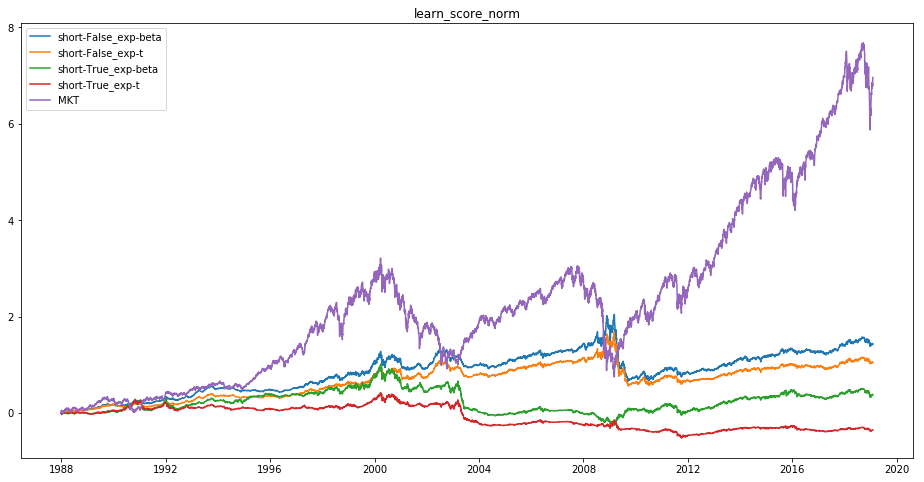

In [148]:
category = 'learn_score_norm'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('learn_score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('learn_score_norm')
plt.savefig("charts/learn_score_norm_True.pdf", bbox_inches='tight')

prsn

### score_norm

In [149]:
inputs = {
    'short-False': 'w_score_norm_short-False.csv',
    'short-True': 'w_score_norm_short-True.csv'
}

,short-False,short-True,MKT
Excess return,-0.049551,-0.062597,0.218898
Volatility,0.103384,0.059364,0.712155
Sharpe ratio,-0.479290,-1.054458,0.307374
Max drawdown,-0.888251,-1.043244,-3.264236
Max relative drawdown,-10.942884,-11.486520,0.000000


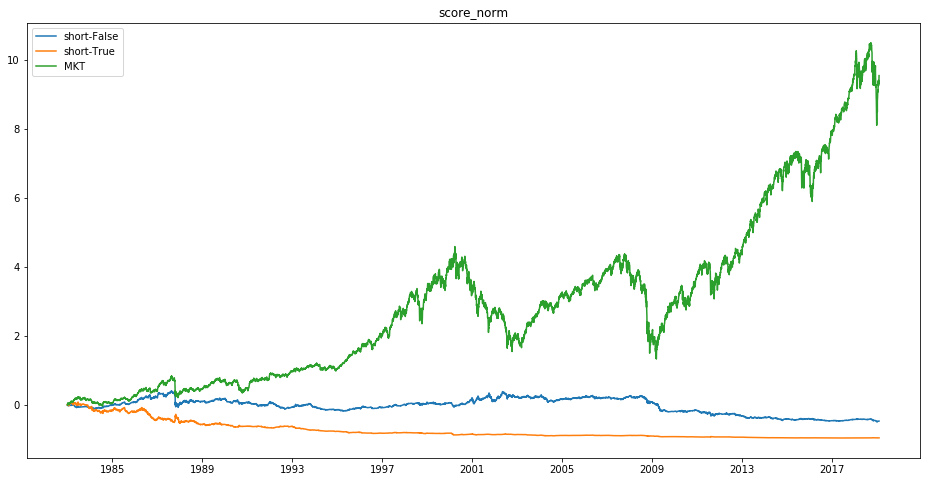

In [150]:
category = 'score_norm'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_False.pdf", bbox_inches='tight')

prsn

,short-False,short-True,MKT
Excess return,0.105181,0.016118,0.218898
Volatility,0.236558,0.169654,0.712155
Sharpe ratio,0.444630,0.095008,0.307374
Max drawdown,-1.496525,-1.154457,-3.264236
Max relative drawdown,-8.238885,-9.537554,0.000000


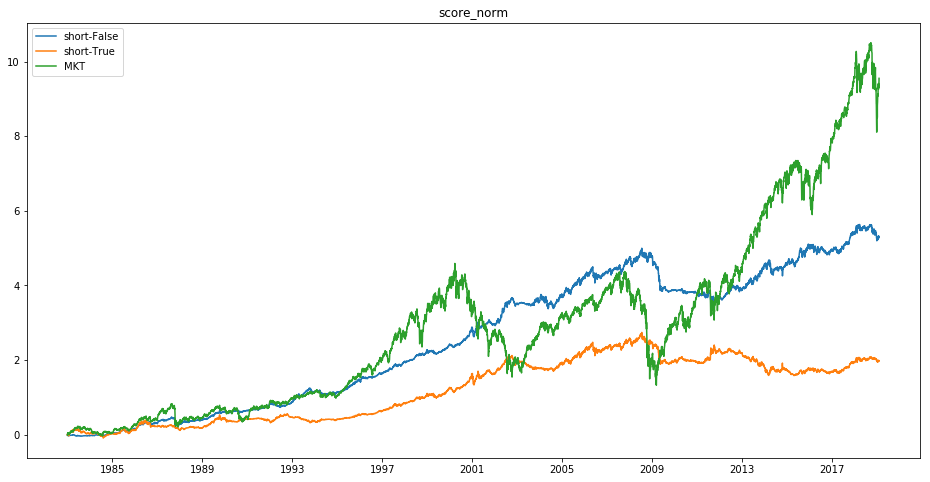

In [151]:
category = 'score_norm'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_True.pdf", bbox_inches='tight')

prsn

### static_ports

In [152]:
inputs = {
    'short-False': 'w_static_ports_short-False.csv',
    'short-True': 'w_static_ports_short-True.csv'
}

,short-False,short-True,MKT
Excess return,0.056351,0.041736,0.218898
Volatility,0.187609,0.168465,0.712155
Sharpe ratio,0.300364,0.247744,0.307374
Max drawdown,-0.848178,-0.752428,-3.264236
Max relative drawdown,-7.824429,-8.067108,0.000000


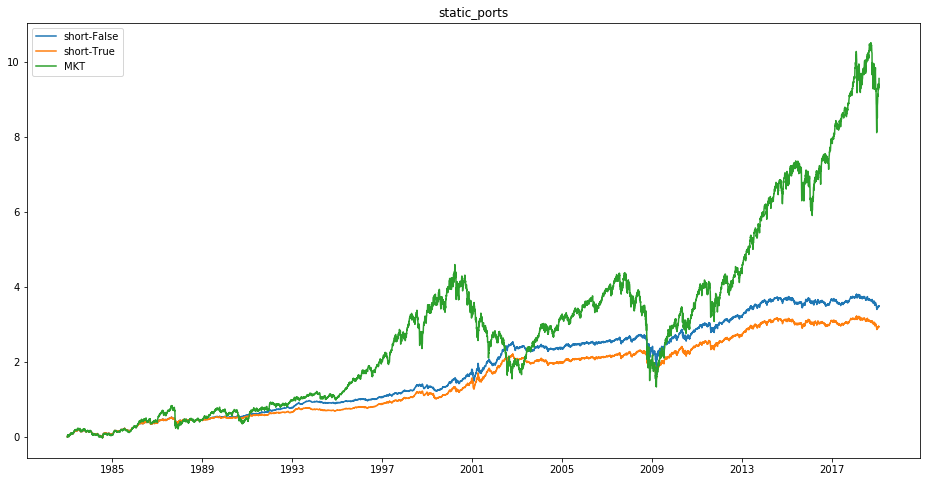

In [153]:
category = 'static_ports'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('static_ports',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('static_ports')
plt.savefig("charts/static_ports_False.pdf", bbox_inches='tight')

prsn

,short-False,short-True,MKT
Excess return,0.178800,0.169007,0.218898
Volatility,0.272492,0.264202,0.712155
Sharpe ratio,0.656166,0.639689,0.307374
Max drawdown,-0.966419,-0.934586,-3.264236
Max relative drawdown,-5.130161,-5.323193,0.000000


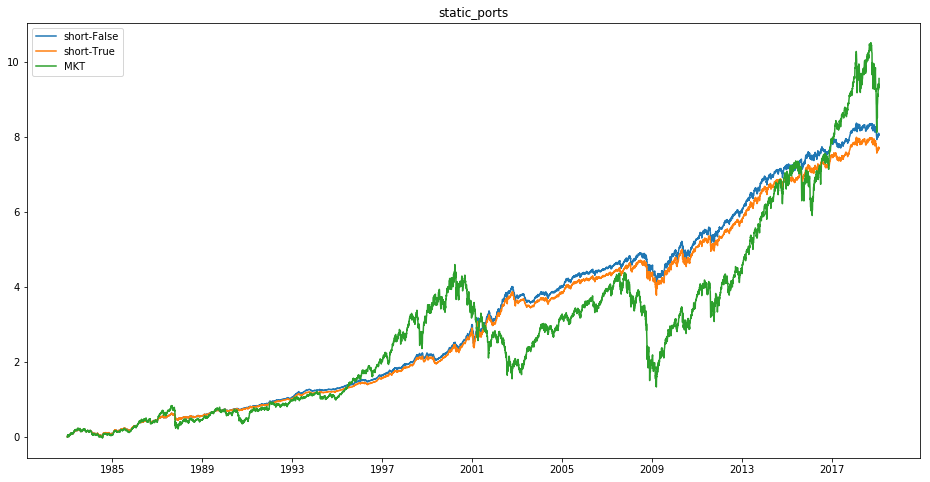

In [154]:
category = 'static_ports'
prsn = pd.DataFrame(index = ['Excess return', 'Volatility', \
                             'Sharpe ratio', 'Max drawdown', 'Max relative drawdown'])

plt.figure('static_ports',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
    
    perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
    prsn[key] = calcStats(perf, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])

prsn['MKT'] = calcStats(perf_MKT, perf_MKT, us_ret.loc[us_ret.index[nonNanRow]:,'RF'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('static_ports')
plt.savefig("charts/static_ports_True.pdf", bbox_inches='tight')

prsn

## i) Time-varying Weight Portfolios_Second Weights

### learn_score_norm

In [71]:
inputs = {
    'short-False_exp-beta': 'w_learn_score_norm_short-False_exp-beta.csv',
    'short-False_exp-t': 'w_learn_score_norm_short-False_exp-t.csv',
    'short-True_exp-beta': 'w_learn_score_norm_short-True_exp-beta.csv',
    'short-True_exp-t': 'w_learn_score_norm_short-True_exp-t.csv'
}

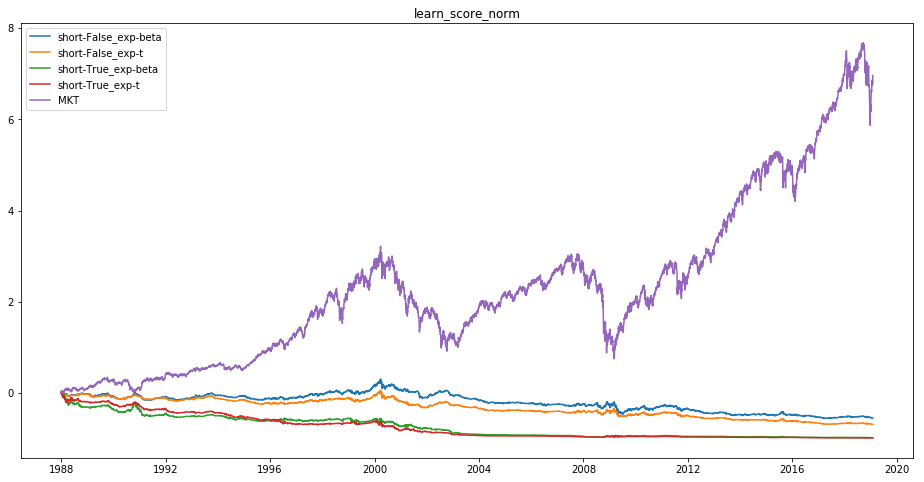

In [72]:
category = 'learn_score_norm'

plt.figure('learn_score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('learn_score_norm')
plt.savefig("charts/learn_score_norm_False.pdf", bbox_inches='tight')

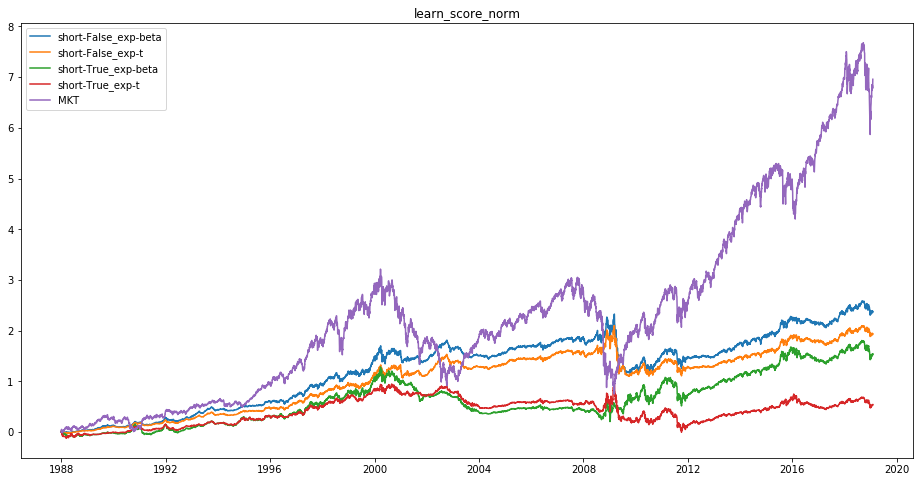

In [73]:
category = 'learn_score_norm'

plt.figure('learn_score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('learn_score_norm')
plt.savefig("charts/learn_score_norm_True.pdf", bbox_inches='tight')

### score_norm

In [74]:
inputs = {
    'short-False': 'w_score_norm_short-False.csv',
    'short-True': 'w_score_norm_short-True.csv'
}

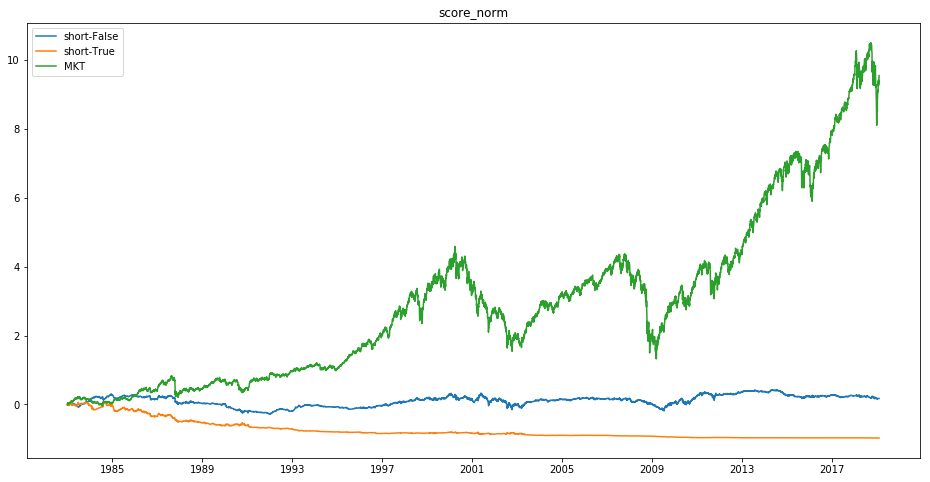

In [75]:
category = 'score_norm'

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_False.pdf", bbox_inches='tight')

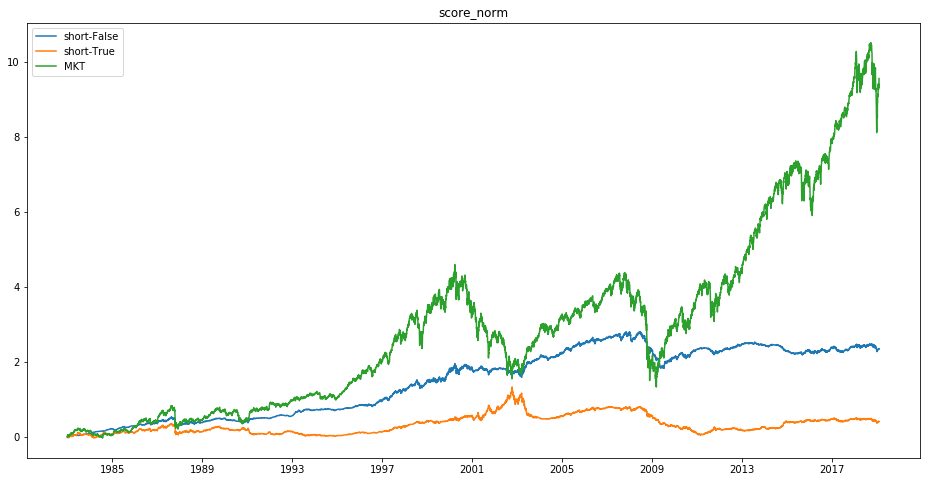

In [76]:
category = 'score_norm'

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_True.pdf", bbox_inches='tight')

### static_ports

In [77]:
inputs = {
    'short-False': 'w_static_ports_short-False.csv',
    'short-True': 'w_static_ports_short-True.csv'
}

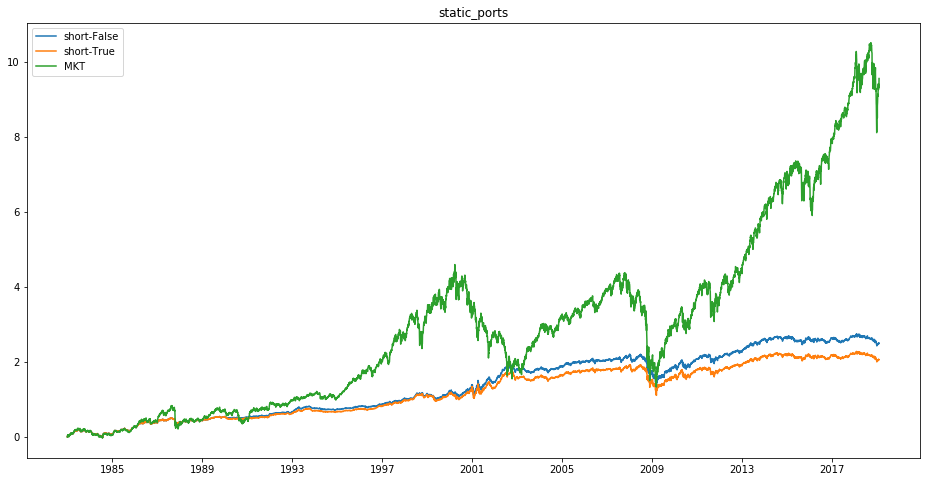

In [78]:
category = 'static_ports'

plt.figure('static_ports',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('static_ports')
plt.savefig("charts/static_ports_False.pdf", bbox_inches='tight')

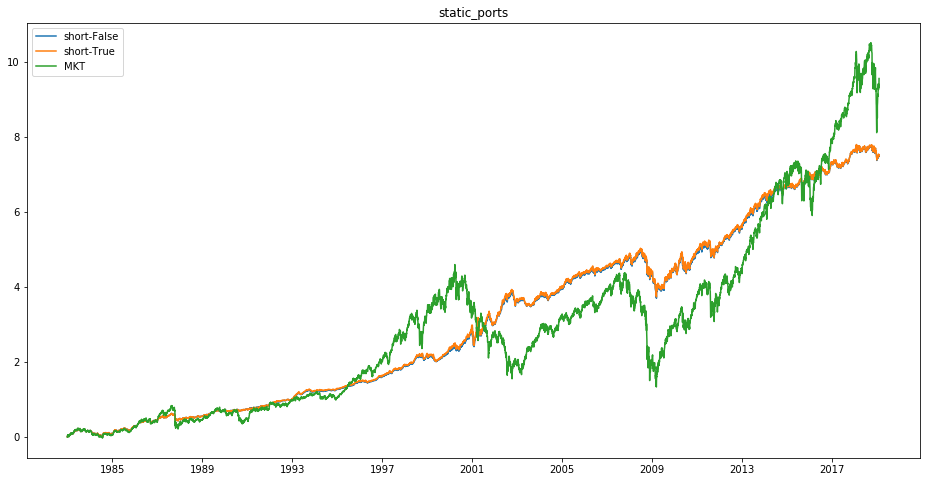

In [79]:
category = 'static_ports'

plt.figure('static_ports',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('static_ports')
plt.savefig("charts/static_ports_True.pdf", bbox_inches='tight')

## j) Time-varying Weight Portfolios_Third Weights

### score_norm

In [114]:
inputs = {
    'short-False': 'w_score_norm_short-False.csv',
    'short-True': 'w_score_norm_short-True.csv'
}

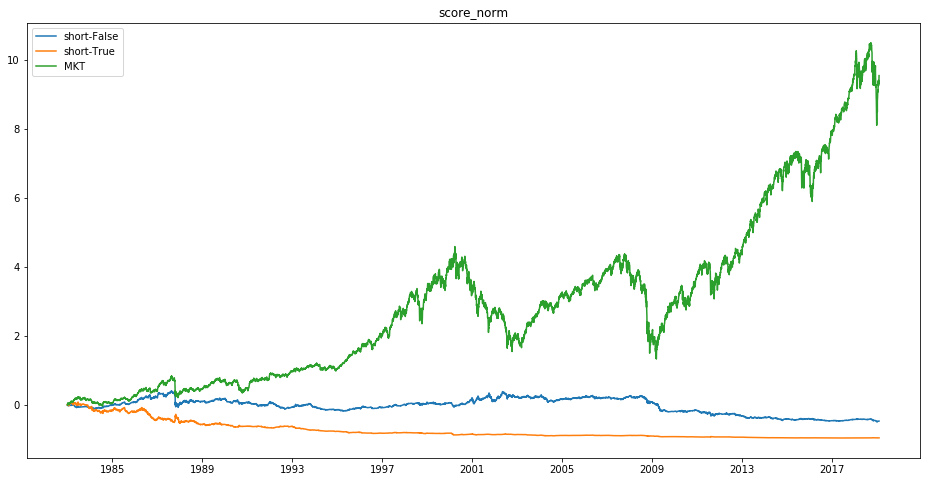

In [115]:
category = 'score_norm'

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, False)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_False.pdf", bbox_inches='tight')

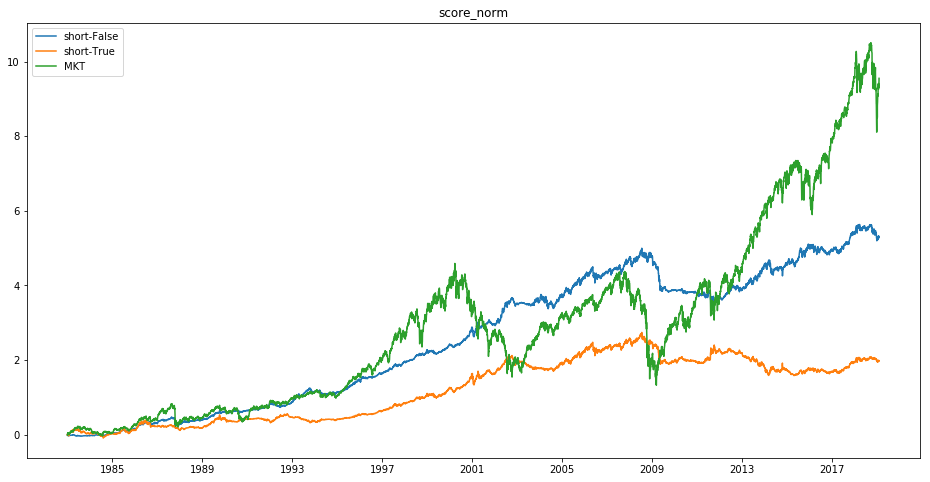

In [116]:
category = 'score_norm'

plt.figure('score_norm',figsize=(16,8))
plt.clf()
for key, value in inputs.items():
    perf, nonNanRow = timeVaryingWts_BT(category, value, us_Price, day_lag, GMV, Tcost_vec, True)
    plt.plot(perf.index, perf.values, label=key)
perf_MKT = cumul_perf(us_ret.loc[us_ret.index[nonNanRow]:,'MKT'])
plt.plot(perf_MKT.index, perf_MKT.values, label='MKT')
plt.legend(loc = 'best')
plt.title('score_norm')
plt.savefig("charts/score_norm_True.pdf", bbox_inches='tight')